# Introduction
For this project, the goal is to analyze biodiversity data from the National Parks Service about endangered species in different parks.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

Four sections were created below to help guide the project's process and progress.
The first section is the project goals, this section will define the high-level objectives and set the intentions for this project.
The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data.
Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals.
Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?
- What is the species distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


# Loading the Data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# species_info.csv - contains data about different species and their conservation status
species = pd.read_csv("species_info.csv")
print(species.columns)
# observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.
observations = pd.read_csv("observations.csv")
print(observations.columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


## Species
The 'species_info.csv' contains information on the censused species in the National Parks.
Each row of the data set includes:

- **category** - The category of the species
- **scientific_name** - The scientific name of tthe species
- **common_names** - The common names the species
- **conservation_status** - The species' conservation status

### Exploring the Data

In [53]:
species.info()
#print(species.shape) #Le informazioni sono troppe sommarie con .shape
print(species.category.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


The data contains 5824 censused species divided in the following categories:
- Mammal
- Bird
- Reptile
- Amphibian
- Fish
- Vascular Plant
- Non-vascular Plant

The censused species include both animals and plants.

However, there are only 5541 distinct scientific names. Some species have many commmon names.

In [54]:
only_names = species.groupby('scientific_name')['common_names'].agg(lambda x: ', '.join(x)).reset_index()
only_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  5541 non-null   object
 1   common_names     5541 non-null   object
dtypes: object(2)
memory usage: 86.7+ KB


In [55]:
species_no_duplicates_scientific_name = species.drop_duplicates(subset='scientific_name')
species_no_duplicates_scientific_name.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  178 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


In [57]:
species_compact = species_no_duplicates_scientific_name.merge(
    only_names[['scientific_name','common_names']], on='scientific_name', how='left')
species_no_duplicates_scientific_name['common_names'] = species_compact['common_names_y']

0                             Gapper's Red-Backed Vole
1                                American Bison, Bison
2    Aurochs, Aurochs, Domestic Cattle (Feral), Dom...
3    Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                    Wapiti Or Elk, Rocky Mountain Elk
Name: common_names, dtype: object


C:\Users\Andriatinavola.Luc\AppData\Local\Temp\ipykernel_4572\4146356077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_no_duplicates_scientific_name['common_names'] = species_compact['common_names_y']


#### Category Count
The vascular plant is the category with the higher number of species. Followed by the birds. The plant species have generally more diversity.

In [58]:
print(species_no_duplicates_scientific_name.groupby('conservation_status').size())
print('There are '+str(species_no_duplicates_scientific_name.conservation_status.isna().sum())+' na values.')

conservation_status
Endangered             15
In Recovery             3
Species of Concern    151
Threatened              9
dtype: int64
There are 5363 na values.


#### Conservation Status
The data lists the followong conservation status for the species:
- Endangered
- Threatened
- Species of concern
- In recovery

Some species do not have a 'conservation status'. Normally, dealing with missing data should be done with care but in this case, the 'na' rows are species without risks.
From the category count table, the category with the most species under srutiny is the "Bird" category.

## Observations

The file 'observations.csv' holds recorded sightings of different species at several national parks for the past 7 days.

In [59]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


### Exploring the Data

The data set contains 3 columns. The first column identifies to the observed species. The second gives the name of the park where the observation was made and the last column shows the number of observed specimens. There are a total of 23296 rows inside the data set.

In [60]:
species_no_duplicates_scientific_name.groupby('conservation_status').count()

,category,scientific_name,common_names
conservation_status,,,
Endangered,15,15,15
In Recovery,3,3,3
Species of Concern,151,151,150
Threatened,9,9,9


In [61]:
print(observations.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


#### Parks
There are four parks inside the data set:
- Great Smoky Mountains National Park
- Yosemite National Park
- Bryce National Park
- Yellowstone National Park

# Analysis

To avoid future errors handling the data, we replace the na values into 'Not considered'.

In [62]:
scientific_name=species_no_duplicates_scientific_name
scientific_name.fillna('Not considered', inplace= True)
scientific_name.groupby('conservation_status').count()

C:\Users\Andriatinavola.Luc\AppData\Local\Temp\ipykernel_4572\394775847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scientific_name.fillna('Not considered', inplace= True)


,category,scientific_name,common_names
conservation_status,,,
Endangered,15,15,15
In Recovery,3,3,3
Not considered,5363,5363,5363
Species of Concern,151,151,151
Threatened,9,9,9


#### Conservation Status count

There are a total of 178 species under observation. The number is around 3.2% of the total of species. So, proportionally, there is not a a high number of species under observation. The observed species is distributed as follow>
- Endangered: 15 species
- Threatened: 9 species
- Species of concern: 151 species
- In recovery: 3 species

However, it is also interesting to look the status for each category:

- Mammal: 30 species out 176 of under observation (17%)
- Bird: 75 species out 488 of under observation (15.4%)
- Reptile: 5 species out 78 of under observation (6.4%)
- Amphibian: 7 species out 79 of under observation (8.9%)
- Fish: 10 species out 125 of under observation (8%)
- Vascular Plant: 46 species out 4262 of under observation (0.09%)
- Non-vascular Plant: 5 species out 333 of under observation (1.5%)

From these numbers, the category with more species under observations are the 'Mammal' and 'Birds'.

### Statistical Significance
The objective is to check is there is contigency between the Plant and Animal species and their protection status.In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Animal|?|?|
|Plant|?|?|



In [43]:
Animals = scientific_name[(scientific_name.category=='Mammal') | (scientific_name.category=='Bird') |
                          (scientific_name.category=='Reptile') | (scientific_name.category=='Amphibian') |
                          (scientific_name.category=='Fish')]
Animals.groupby('conservation_status').count()

,category,scientific_name,common_names
conservation_status,,,
Endangered,14,14,14
In Recovery,3,3,3
Not considered,819,819,819
Species of Concern,103,103,103
Threatened,7,7,7


In [44]:
Plants = scientific_name[(scientific_name.category=='Vascular Plant') | (scientific_name.category=='Nonvascular Plant')]
Plants.groupby('conservation_status').count()

,category,scientific_name,common_names
conservation_status,,,
Endangered,1,1,1
Not considered,4544,4544,4544
Species of Concern,48,48,48
Threatened,2,2,2


||Protected|Not protected|
|-|-|-|
|Animal|127|819|
|Plant|51|4544|

The first test will be called `contingency1` and will need to be filled with the correct numbers for Plants and Animals.

The results from the chi-squared test returns many values, the second value which is 2.38e-87 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value is much smaller than 0.05 which can be take that the difference between Animal and Plants is statistically significant. Animals are shown to have a statistically significant higher rate of needed protection compared with Plants. 

In [45]:
from scipy.stats import chi2_contingency

contingency1 = [[127, 819],
              [51, 4544]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=378.705864329933, pvalue=2.3807629908783554e-84, dof=1, expected_freq=array([[  30.38946039,  915.61053961],
       [ 147.61053961, 4447.38946039]]))

#### Most Common Species

We check the 'species' Dataframe to check wich species are the most common. We will check the most frequent inside the common name column.

In [63]:
from collections import Counter
import re

def extract_words(text):
    words = re.findall(r'\w+', text.lower())
    return words

In [64]:
print(species_no_duplicates_scientific_name['common_names'].head())

0                             Gapper's Red-Backed Vole
1                                American Bison, Bison
2    Aurochs, Aurochs, Domestic Cattle (Feral), Dom...
3    Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                    Wapiti Or Elk, Rocky Mountain Elk
Name: common_names, dtype: object


In [65]:
species_no_duplicates_scientific_name['names']=species_no_duplicates_scientific_name['common_names'].apply(extract_words)
common_names=[name for names in species_no_duplicates_scientific_name['names'] for name in names]
print(cmmon)

C:\Users\Andriatinavola.Luc\AppData\Local\Temp\ipykernel_4572\1679012711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_no_duplicates_scientific_name['names']=species_no_duplicates_scientific_name['common_names'].apply(extract_words)


#### Endangered Species

In [9]:
print('The following species are in danger of extinction:')
endangered_species = scientific_name.scientific_name[scientific_name.conservation_status=='Endangered']
for a in endangered_species:
    print(' - '+a)

The following species are in danger of extinction:
 - Canis lupus
 - Canis rufus
 - Myotis grisescens
 - Myotis sodalis
 - Glaucomys sabrinus coloratus
 - Grus americana
 - Vermivora bachmanii
 - Picoides borealis
 - Etheostoma percnurum
 - Noturus baileyi
 - Geum radiatum
 - Chasmistes liorus
 - Ovis canadensis sierrae
 - Gymnogyps californianus
 - Rana sierrae


In [10]:
scientific_name[scientific_name.category=='Bird'].groupby('conservation_status').count()

,category,scientific_name,common_names
conservation_status,,,
Endangered,4,4,4
In Recovery,3,3,3
Not considered,413,413,413
Species of Concern,68,68,68


The 'Bird' category has 4 endangered species.

In [11]:
endangered_species = scientific_name.scientific_name[
    (scientific_name.conservation_status=='Endangered') & (scientific_name.category=='Bird')]
for a in endangered_species:
    print(' - '+a)

 - Grus americana
 - Vermivora bachmanii
 - Picoides borealis
 - Gymnogyps californianus


In [12]:
scientific_name[scientific_name.category=='Mammal'].groupby('conservation_status').count()

,category,scientific_name,common_names
conservation_status,,,
Endangered,6,6,6
Not considered,146,146,146
Species of Concern,22,22,22
Threatened,2,2,2


The 'Mammal' category has 6 endangered species.

In [13]:
endangered_species = scientific_name.scientific_name[
    (scientific_name.conservation_status=='Endangered') & (scientific_name.category=='Mammal')]
for a in endangered_species:
    print(' - '+a)

 - Canis lupus
 - Canis rufus
 - Myotis grisescens
 - Myotis sodalis
 - Glaucomys sabrinus coloratus
 - Ovis canadensis sierrae


In [14]:
scientific_name[scientific_name.conservation_status=='Endangered'].groupby('category').count()

,scientific_name,common_names,conservation_status
category,,,
Amphibian,1,1,1
Bird,4,4,4
Fish,3,3,3
Mammal,6,6,6
Vascular Plant,1,1,1


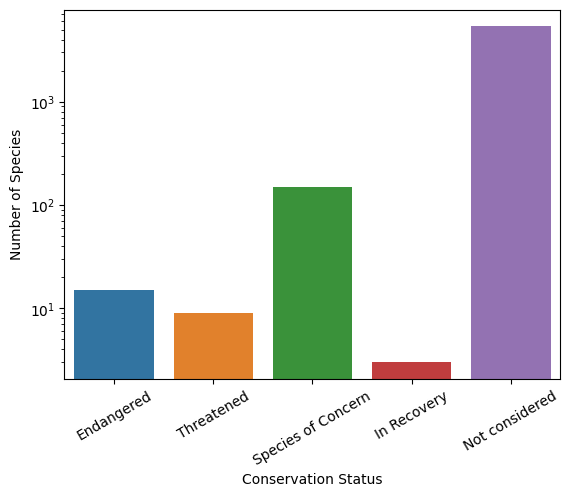

In [43]:
conservation_rank=['Endangered','Threatened','Species of Concern','In Recovery','Not considered']
sns.countplot(x='conservation_status',data=scientific_name,order=conservation_rank)
plt.yscale('log')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=30)
plt.show()

In [23]:
observations_status = observations.merge(
    species_no_duplicates_scientific_name[['scientific_name', 'conservation_status']], on='scientific_name', how='left')
observations_status = observations_status.merge(
    species_no_duplicates_scientific_name[['scientific_name', 'category']], on='scientific_name', how='left')
observations_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      23296 non-null  object
 1   park_name            23296 non-null  object
 2   observations         23296 non-null  int64 
 3   conservation_status  23296 non-null  object
 4   category             23296 non-null  object
dtypes: int64(1), object(4)
memory usage: 910.1+ KB


In [24]:
print(observations_status.groupby('category').sum('observations'))

                   observations
category                       
Amphibian                 43971
Bird                     292833
Fish                      70818
Mammal                   116696
Nonvascular Plant        190653
Reptile                   44678
Vascular Plant          2555090


In [26]:
species_no_duplicates_scientific_name.groupby('category').count()

,scientific_name,common_names,conservation_status
category,,,
Amphibian,79,79,79
Bird,488,488,488
Fish,125,125,125
Mammal,176,176,176
Nonvascular Plant,333,333,333
Reptile,78,78,78
Vascular Plant,4262,4262,4262


Compared to the number of censused species, the numbers of observed specimen for each category have similar shape. The higher number of observations is for Vascular Plants and Birds.